In [15]:
from PIL import Image, ImageDraw, ImageFont
import sys

import pyocr
import pyocr.builders

### 初期設定
tool : tesseract使う  
use_rang : Eng使う、Japは1を指定  
filepath : 画像ファイル  

In [34]:
tool = pyocr.get_available_tools()[0]
use_lang = tool.get_available_languages()[1]
filepath = 'resource/PlanView.png'
image = Image.open(filepath)

### テキストをただとるだけ、Digitも同じ感じ

In [ ]:
txt = tools[0].image_to_string(
    image,
    lang=use_lang,
    builder=pyocr.builders.TextBuilder()
)

### 文字の位置(box的な)もとる

In [35]:
word_boxes = tool.image_to_string(
    image,
    lang=use_lang,
    builder=pyocr.builders.WordBoxBuilder()
)

### 行ごとまとめてとる

In [ ]:
line_and_word_boxes = tool.image_to_string(
    image,
    lang=use_lang,
    builder=pyocr.builders.LineBoxBuilder()
)

### box描く関数

In [29]:
def draw_boxes(image, word_boxes, color):
    """長方形の左上と右下の頂点を受け取り画像に描画する"""
    draw = ImageDraw.Draw(image)

    for word_box in word_boxes:
        
        pos1_x = word_box.position[0][0]
        pos1_y = word_box.position[0][1]
        pos2_x = word_box.position[1][0]
        pos2_y = word_box.position[1][1]
        
        draw.polygon([
            pos1_x, pos1_y,
            pos2_x, pos1_y,
            pos2_x, pos2_y,
            pos1_x, pos2_y], None, color)
            
    return image

### Text書く関数

In [32]:
def draw_texts(image, word_boxes, color):
    draw = ImageDraw.Draw(image)
    fnt = ImageFont.truetype('resource/Kokoro.otf',60)

#    日本語文を扱う場合には、上記のようにフォントを設定する必要がある
#    draw.text()の引数に、font=fntを追加する。
    
    for word_box in word_boxes:
        
        pos1_x = word_box.position[0][0]
        pos2_y = word_box.position[1][1]
    
        draw_position = (pos1_x, pos2_y)
        
        content = word_box.content
        
        draw.text(draw_position, content, color, font=fnt)
        
    return image

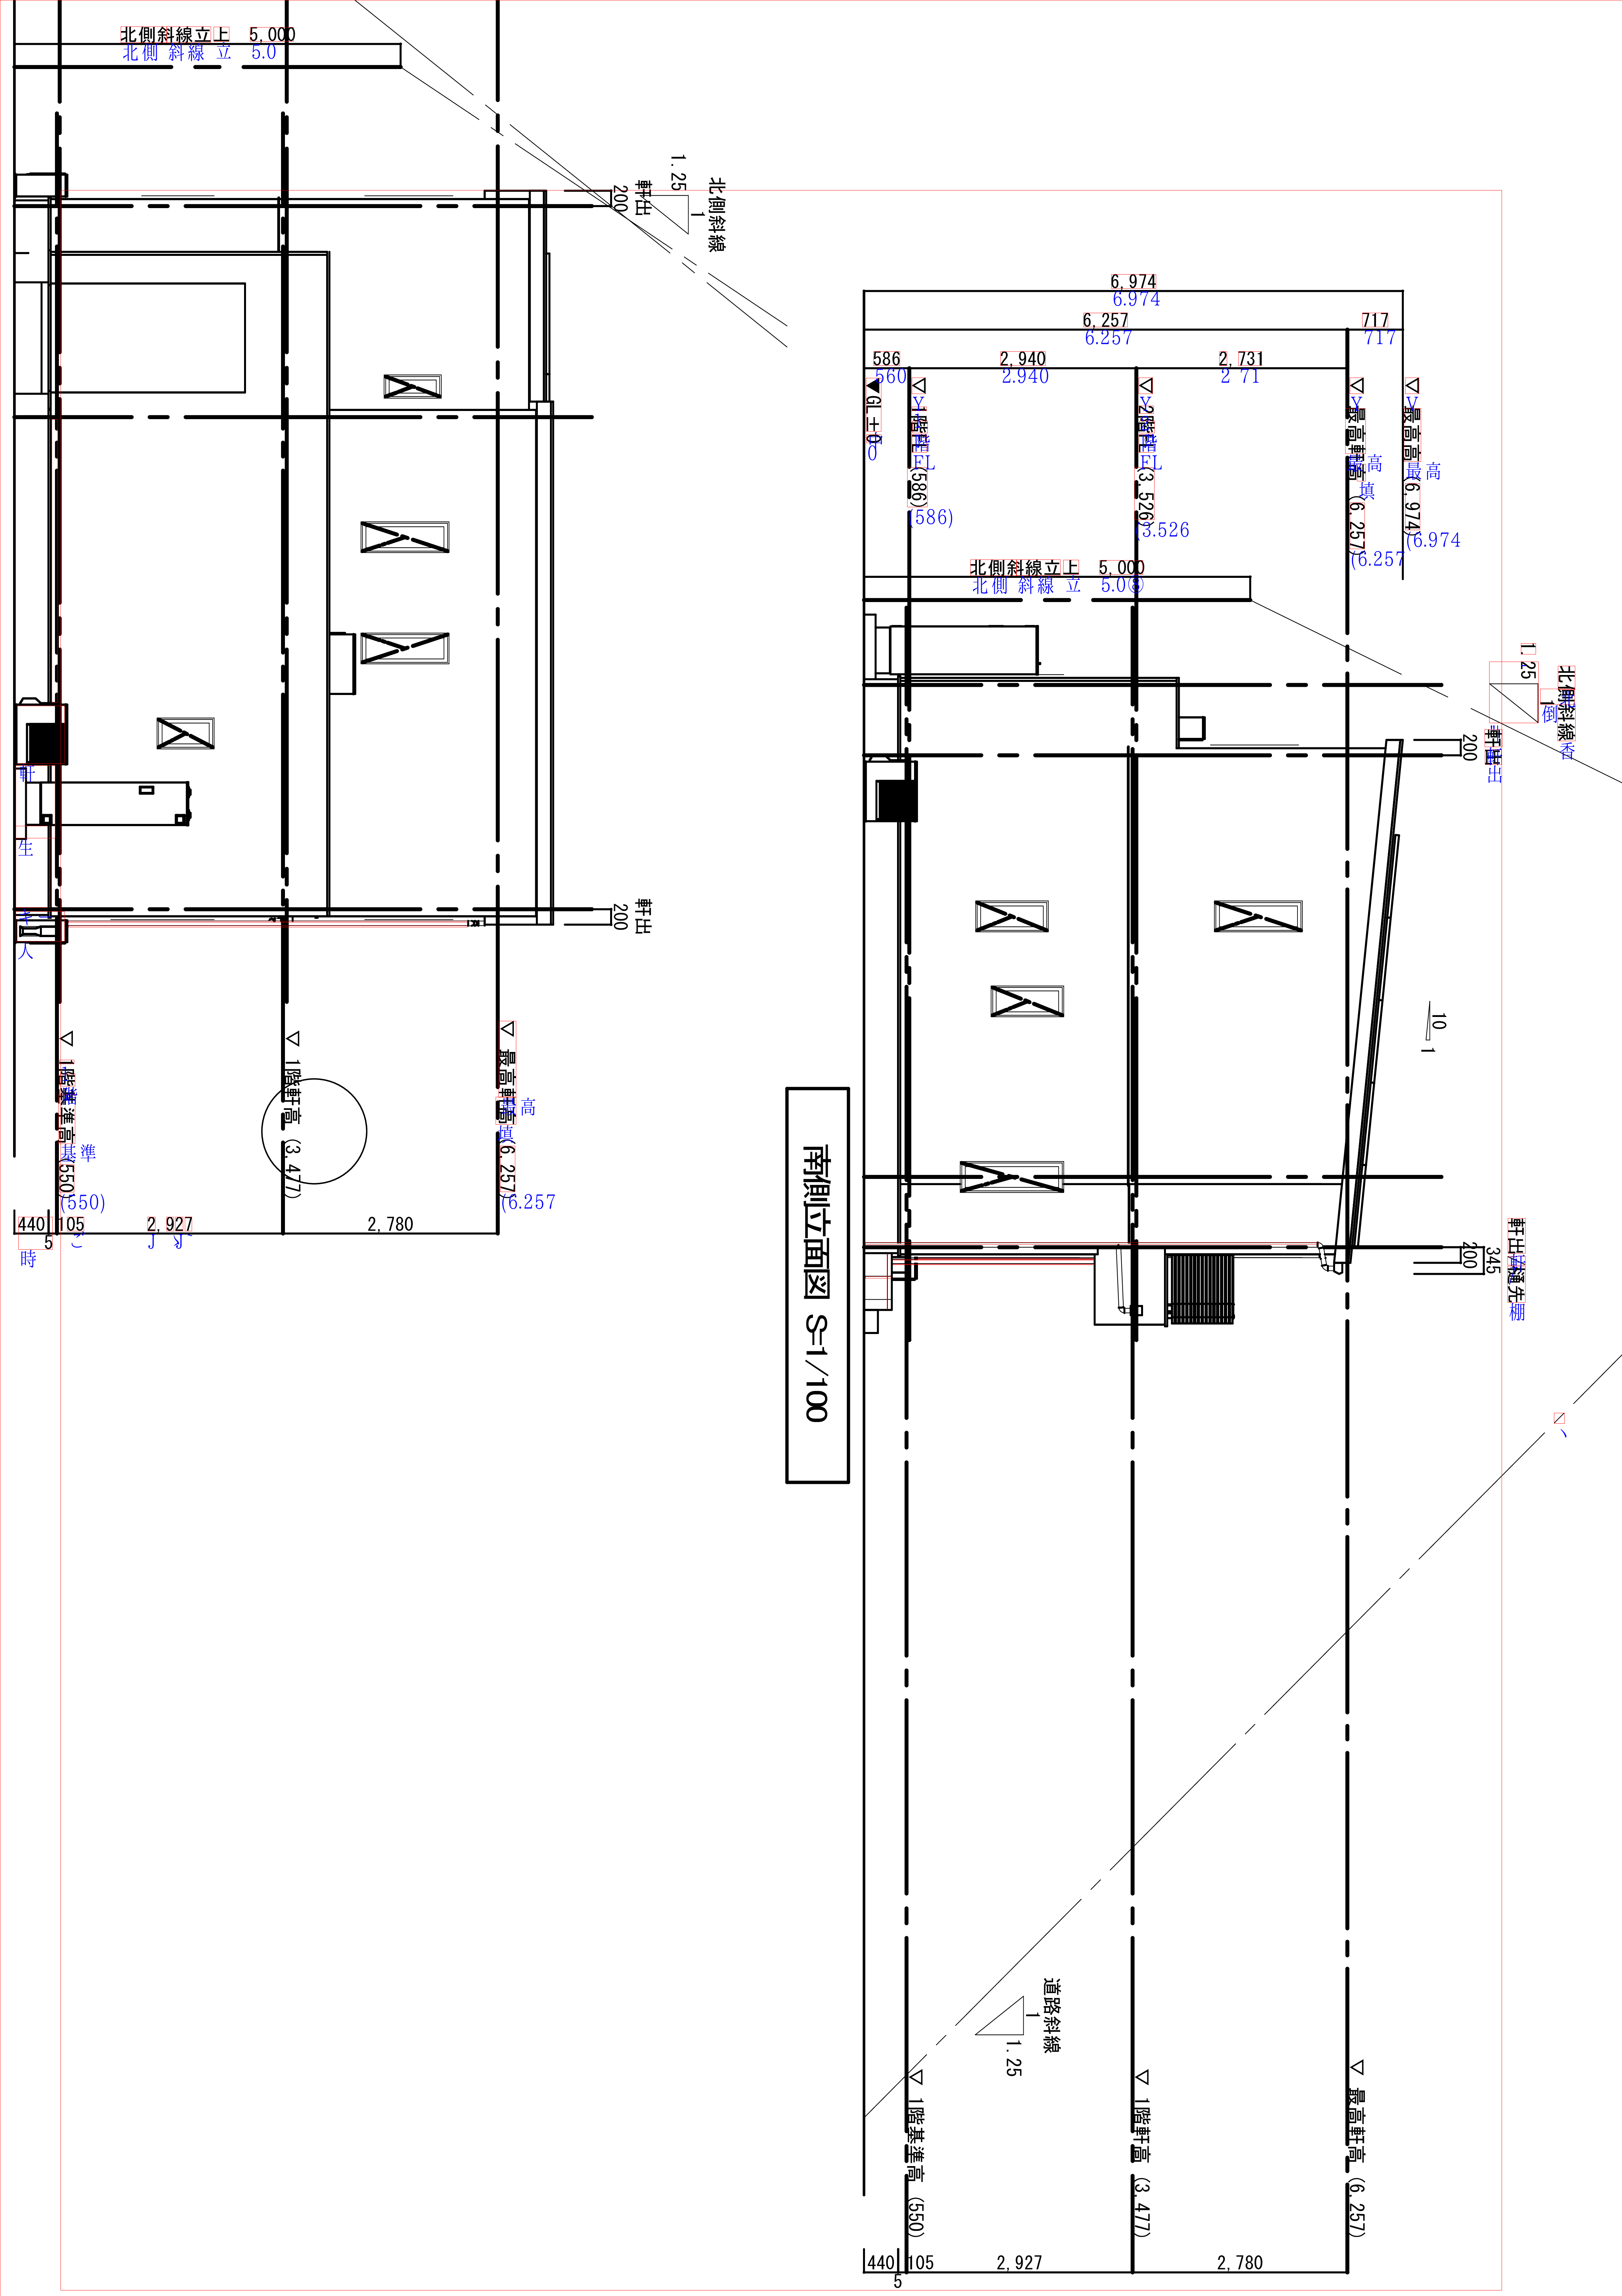

In [36]:
draw_boxes(image, word_boxes, 'Red')
draw_texts(image, word_boxes, 'blue')